# 차원축소
## 차원 선택(축소) 방법
- 1) 사람이 경험으로 선택하는 방법
- 2) SelectKBest: 목적 변수와의 관계가 큰 입력 변수 선택
- 3) PCA: 입력 변수들 간의 독립적인 성분을 기준으로 차원축소

## 시각화를 위한 차원 축소
- tSNE: 시각화를 위한 2또는 3차원 차원 축소 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

In [3]:
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target
print(X.shape)
X[:3]

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [5]:
# 스케일링
sc = MinMaxScaler() # chi2는 양수만 다루므로 min-max 스케일링 사용
X = sc.fit_transform(X)

In [6]:
X = pd.DataFrame(sc.fit_transform(X), columns=cancer.feature_names)
X[:3]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433


## 30개의 특성을 모두 사용하는 경우
- 교차검증 사용

In [8]:
rfc = RandomForestClassifier(n_estimators=50)
cross_val_score(rfc, X, y, cv=5).mean().round(4) # 5번 시행, 평규, 교차검증
# train_test_split() train, fit, test, score.. 와의 차이점은? 1회만 시행

0.9614

# SelectKBest

## 6개의 특성만 사용하는 경우
- SelectKBest를 사용하여 목적변수 y와의 관계가 큰 변수를 k개 선택

In [10]:
from sklearn.feature_selection import SelectKBest, chi2
sb = SelectKBest(chi2, k=6)
X_best6 = sb.fit_transform(X, y)
X_best6.shape

(569, 6)

In [8]:
X_best6[:3]

array([[0.70313964, 0.73111332, 0.62077552, 0.66831017, 0.45069799,
        0.91202749],
       [0.20360825, 0.34875746, 0.60690146, 0.53981772, 0.43521431,
        0.63917526],
       [0.46251172, 0.63568588, 0.55638563, 0.50844166, 0.37450845,
        0.83505155]])

### 해당 특성 보기

In [11]:
X.columns[sb.get_support()]

Index(['mean concavity', 'mean concave points', 'worst radius',
       'worst perimeter', 'worst area', 'worst concave points'],
      dtype='object')

In [12]:
cross_val_score(rfc, X_best6, y, cv=5).mean().round(4)

0.9473

## 2개의 특성만 사용하는 경우

In [15]:
sb = SelectKBest(chi2, k=2)
X_best2 = sb.fit_transform(X, y)
print(X_best2.shape)
print(X.columns[sb.get_support()])
cross_val_score(rfc, X_best2, y, cv=5).mean().round(4)

(569, 2)
Index(['mean concave points', 'worst concave points'], dtype='object')


0.8981

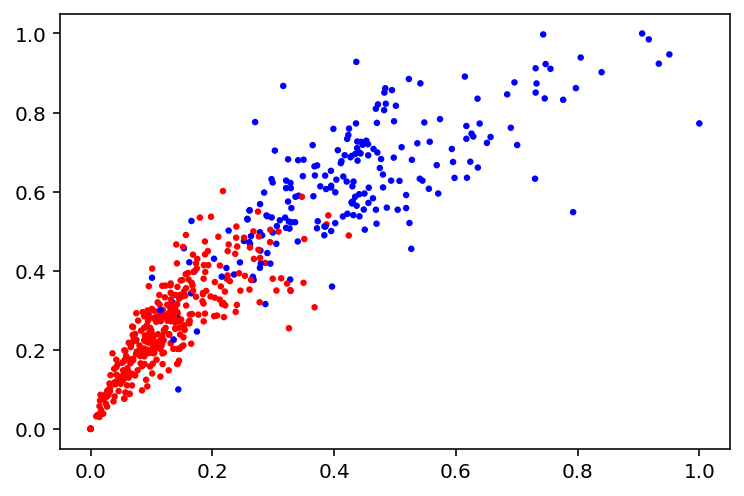

In [22]:
plt.scatter(X['mean concave points'], X['worst concave points'],
           c = y, s=5, cmap='bwr')

In [14]:
# 과제: 2개, 10개의 컬럼을 선택하면 성능은? 
# 2개의 변수를 사용한 경우 이를 x-y 축으로 산포도를 그리면서 암/정상을 색으로 구분하여 표시

# 목적변수와의 상관관계가 큰 변수를 사용하는 것이며 이의 단점은 목적 변수가 달라지면 특성 선택도 새로 해야 한다는 것

# PCA를 사용한 차원 축소
## 6개의 주성분 사용

In [23]:
pca = PCA(n_components=1)
X_pca6 = pca.fit_transform(X)
X_pca6.shape
X_pca6[:10]

array([[1.38702121],
       [0.46230825],
       [0.95462147],
       [1.00081589],
       [0.62682783],
       [0.3835405 ],
       [0.47017602],
       [0.28236109],
       [0.55151238],
       [0.94918173]])

In [38]:
pca = PCA(n_components=30)
X_pca6 = pca.fit_transform(X)
X_pca6.shape
X_pca6[:10]

array([[ 1.38702121e+00,  4.26895326e-01, -5.41702643e-01,
         4.84832190e-02, -7.21980726e-02,  1.90816932e-01,
         2.36313238e-01, -3.94558734e-02,  7.75900857e-02,
         1.55294676e-01,  9.65478785e-02,  3.09685402e-02,
        -4.18570783e-02, -1.25865131e-01, -1.37145070e-01,
         2.55544326e-03, -3.66632343e-02,  3.18747121e-02,
        -6.29638608e-02, -2.98687890e-02, -3.86137373e-02,
        -3.93213259e-04,  5.44699054e-03,  2.98088174e-03,
         2.13136132e-02, -4.81575147e-03, -4.12666646e-02,
        -4.32549684e-03,  6.22252173e-03, -7.89493087e-03],
       [ 4.62308252e-01, -5.56946737e-01, -2.05174584e-01,
        -4.28298503e-02,  1.61111183e-02,  1.56035119e-02,
         4.31393392e-02,  2.06441233e-02, -7.06389775e-02,
        -8.52836679e-02,  7.78629430e-02, -1.32641940e-01,
         1.66590218e-01, -5.47892128e-02,  6.70341882e-02,
        -5.05213283e-02, -2.29900377e-03, -3.09994842e-02,
         3.97927548e-02, -2.48327587e-03,  1.46909595e-

In [36]:
cross_val_score(rfc, X_pca6, y, cv=5).mean().round(4)

0.949

In [39]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([5.30976894e-01, 1.72834896e-01, 7.11444201e-02, 6.41125883e-02,
        4.08607204e-02, 3.07149442e-02, 1.58083746e-02, 1.19147161e-02,
        9.88429103e-03, 9.45446106e-03, 8.49396551e-03, 7.57976457e-03,
        6.56638137e-03, 4.74811462e-03, 2.69423338e-03, 2.57754484e-03,
        1.83755588e-03, 1.51271660e-03, 1.37718463e-03, 1.05959242e-03,
        9.83061040e-04, 7.84496266e-04, 5.28060046e-04, 5.09986666e-04,
        4.30073326e-04, 3.29617326e-04, 1.90574049e-04, 5.59104265e-05,
        2.88966877e-05, 5.96453235e-06]),
 0.9999999999999999)

##  2개의 주성분 사용

In [32]:
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X) # 주성분을 얻을 때 y를 고려하지 않았다! 향후 임의의 목적(y)에 대해서 동일한 주성분을 사용할 수 있다
X_pca2[:3]

array([[ 1.38702121,  0.42689533],
       [ 0.46230825, -0.55694674],
       [ 0.95462147, -0.10970115]])

In [25]:
cross_val_score(rfc, X_pca2, y, cv=5).mean().round(4)

0.9525

In [26]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.53097689, 0.1728349 , 0.07114442, 0.06411259, 0.04086072,
        0.03071494, 0.01580837, 0.01191472, 0.00988429, 0.00945446,
        0.00849397, 0.00757976, 0.00656638, 0.00474811, 0.00269423]),
 0.9877887652532485)

In [1]:
for n in range(len(X_pca2)):
    plt.scatter(X_pca2[n,0],X_pca2[n,1], c=y[n], marker=markers[y[n]], s=1)
#     plt.text(df['서비스업'][n], df['제조업'][n], df.index[n])
    

NameError: name 'X_pca2' is not defined

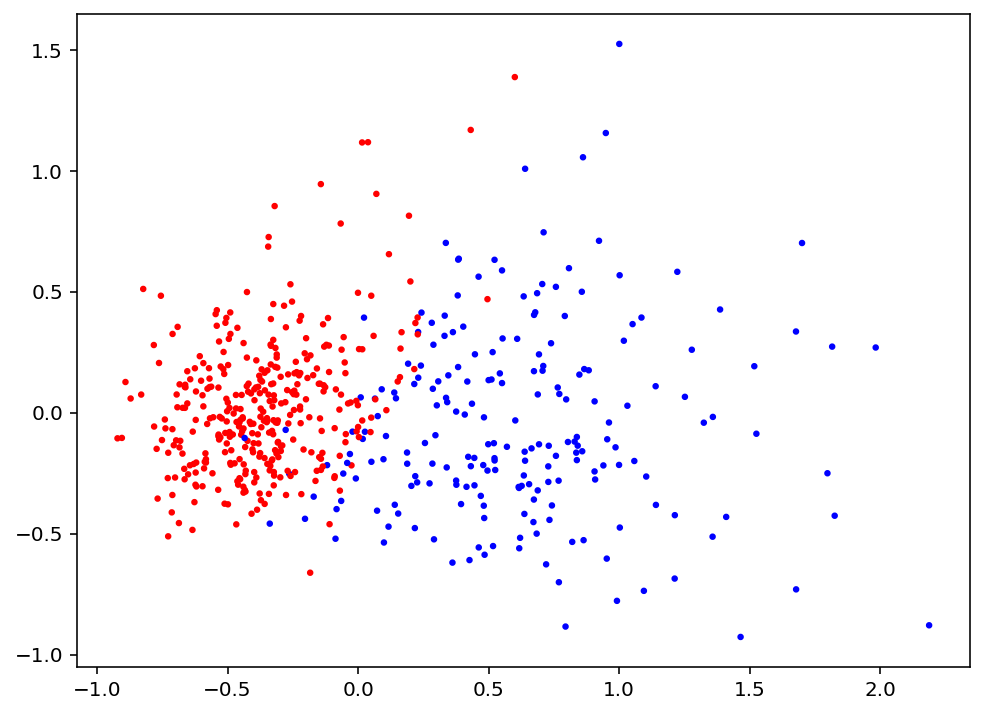

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0],X_pca2[:,1], c=y, s=5, cmap='bwr')

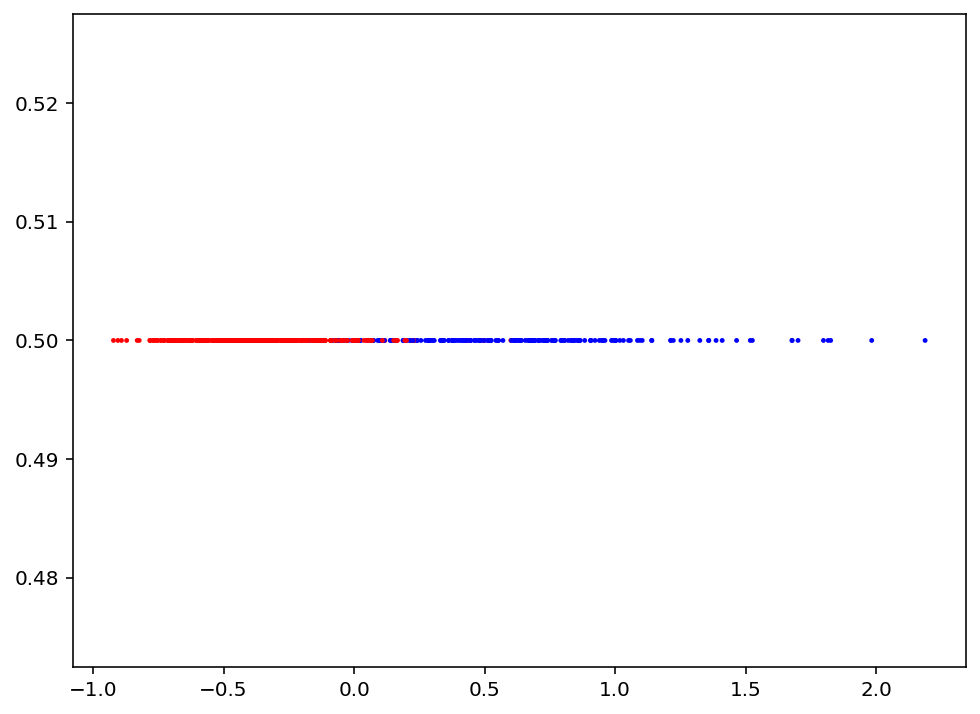

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0],[0.5]*len(X_pca2), c=y, s=2, cmap='bwr')

## pca 생성 컴포넌트

In [34]:
pca.components_.round(3)

array([[ 0.243,  0.096,  0.253,  0.216,  0.11 ,  0.24 ,  0.302,  0.322,
         0.111,  0.043,  0.122, -0.   ,  0.119,  0.104, -0.005,  0.129,
         0.066,  0.125,  0.014,  0.046,  0.259,  0.114,  0.261,  0.206,
         0.124,  0.205,  0.244,  0.371,  0.096,  0.095],
       [-0.261, -0.059, -0.239, -0.231,  0.2  ,  0.214,  0.114, -0.008,
         0.211,  0.406, -0.067,  0.06 , -0.051, -0.083,  0.136,  0.222,
         0.103,  0.106,  0.14 ,  0.172, -0.244, -0.04 , -0.212, -0.199,
         0.229,  0.198,  0.155,  0.044,  0.151,  0.258]])

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.31.41.png?raw=1" align='left'  width=400>

# t-SNE 시각화

[t-SNE] Computing 568 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.042s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 0.515214
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.366352
[t-SNE] KL divergence after 1000 iterations: 0.099665


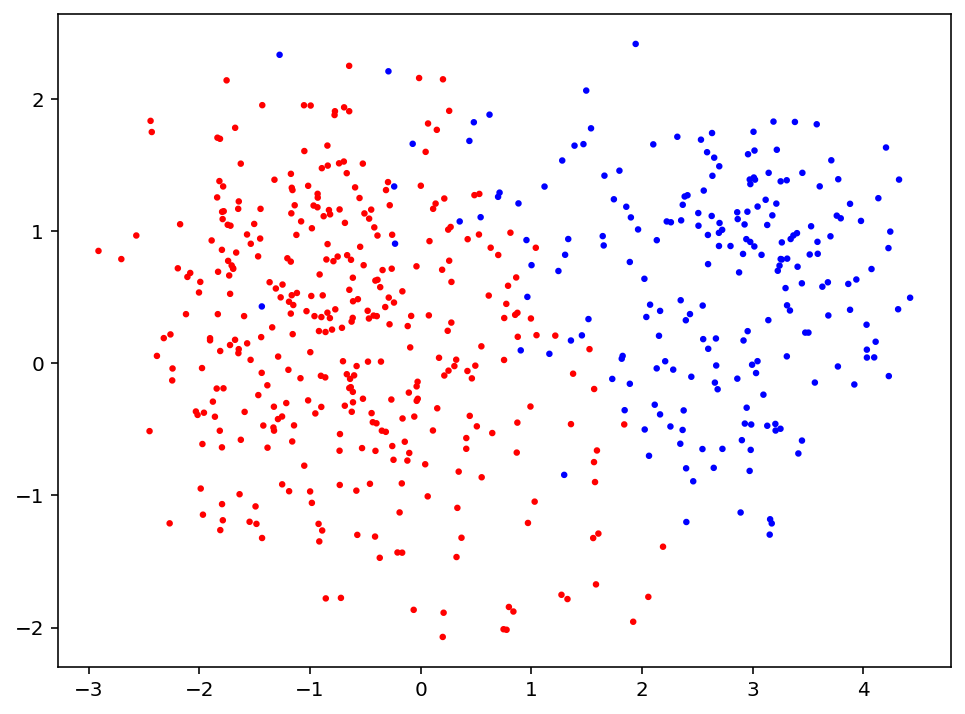

In [44]:
tsne = TSNE(n_components=2, verbose=1, perplexity=300, n_iter=1000)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(tsne_results[:,0],tsne_results[:,1], c=y, cmap='bwr',s=5)
plt.show()